# Import Libraries

In [58]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [59]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [60]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [61]:
!pip install en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement en_core_web_sm (from versions: none)
ERROR: No matching distribution found for en_core_web_sm


In [62]:
#Install Packages
!pip install app-store-scraper
!pip install wordcloud

#Import Libraries
from app_store_scraper import AppStore

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
import json,os,uuid
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbkhn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [34]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

# Data Collection

In [63]:
#Collect all the ChatGPT reviews from App Store
a_reviews = AppStore('us','linkedin','288429040')
a_reviews.review(sleep=1)

2023-10-29 12:03:51,044 [INFO] Base - Initialised: AppStore('us', 'linkedin', 288429040)
2023-10-29 12:03:51,044 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/us/app/linkedin/id288429040
2023-10-29 12:03:56,949 [INFO] Base - [id:288429040] Fetched 60 reviews (60 fetched in total)
2023-10-29 12:04:05,052 [INFO] Base - [id:288429040] Fetched 140 reviews (140 fetched in total)
2023-10-29 12:04:14,632 [INFO] Base - [id:288429040] Fetched 240 reviews (240 fetched in total)
2023-10-29 12:04:21,629 [INFO] Base - [id:288429040] Fetched 320 reviews (320 fetched in total)
2023-10-29 12:04:29,660 [INFO] Base - [id:288429040] Fetched 400 reviews (400 fetched in total)
2023-10-29 12:04:36,933 [INFO] Base - [id:288429040] Fetched 480 reviews (480 fetched in total)
2023-10-29 12:04:43,893 [INFO] Base - [id:288429040] Fetched 560 reviews (560 fetched in total)
2023-10-29 12:04:51,025 [INFO] Base - [id:288429040] Fetched 640 reviews (640 fetched in total)
2023-10-29 12:05:00,523 [IN

In [64]:
data = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
data = data.join(pd.DataFrame(data.pop('review').tolist()))
data.head()

,date,review,rating,isEdited,title,userName,developerResponse
0,2023-09-30 00:42:10,I hired Zalak to design my site based on two c...,5,False,Zalak Patel is a consummate PROFESSIONAL,Greg Ladner,NaN
1,2023-02-01 01:55:07,Update: LinkedIn heard my prayers and fixed my...,5,True,Love LinkedIn! But the app…,StrawberryBananaOrange,"{'id': 34549269, 'body': 'We appreciate you ta..."
2,2023-10-25 11:39:30,LinkedIn was okay until I became a creator. It...,5,False,Better as a creator,smithrof,NaN
3,2021-06-25 23:06:36,I spent about an hour carefully crafting a rep...,1,False,Need Auto-Saving for Drafts,Jinjarella,"{'id': 23826763, 'body': 'We appreciate you ta..."
4,2021-09-21 15:30:25,After using the application for quite a while ...,1,False,Unprofessional customer service and inaccurate...,ChanL996,NaN


In [13]:
data.shape

(5580, 6)

In [14]:
data.drop(['isEdited','userName'],axis=1,inplace=True) #Delete columns
data = data[['date','title','review','rating']] #Rearrange columns
data.head()

,date,title,review,rating
0,2022-11-07 19:35:40,Lack of Customer Service,I think it’s silly to pretend that the overall...,2
1,2023-04-01 19:24:38,Facebook is a joke of a social media app and t...,My mom made a new account which in it of itsel...,1
2,2023-03-31 04:37:05,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,"this is supposed to be a ""Open opinion"" no jud...",1
3,2023-03-26 19:49:24,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...,"this is supposed to be a ""Open opinion"" no jud...",1
4,2023-04-15 09:36:20,Not tagging people (specifically) The set up i...,"I can't believe you guys, it's annoying to not...",1


In [15]:
#Storing Data
data.to_csv('facebook_reviews.csv',index=False)

In [16]:
data.to_excel('facebook_reviews.xlsx', index=False)

# Exploratory Data Analysis

In [17]:
data = pd.read_csv('facebook_reviews.csv')

In [18]:
data.shape

(5580, 4)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    5580 non-null   object
 1   title   5580 non-null   object
 2   review  5580 non-null   object
 3   rating  5580 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 174.5+ KB


In [20]:
data.describe()

,rating
count,5580.000000
mean,1.541577
std,1.051408
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,5.000000


In [21]:
data.describe(include='object')

,date,title,review
count,5580,5580,5580
unique,5580,5116,5578
top,2022-11-07 19:35:40,Censorship,Facebook is a platform that has turned into no...
freq,1,55,2


<h3> Analysis of Rating column </h3>

In [22]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1    4031
2     736
3     411
4     144
5     258
Name: rating, dtype: int64

In [23]:
data['rating'].value_counts(normalize=True).mul(100).round(2).sort_index()

1    72.24
2    13.19
3     7.37
4     2.58
5     4.62
Name: rating, dtype: float64

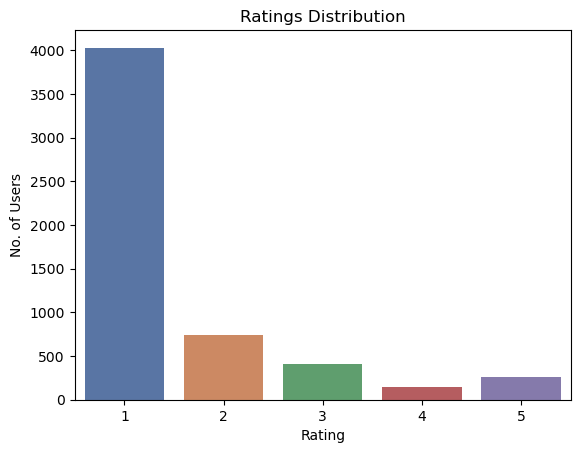

In [24]:
#Plot
palette = "deep"
sns.set_palette(palette)

sns.countplot(data=data, x='rating')

plt.xlabel('Rating')
plt.ylabel('No. of Users')
plt.title('Ratings Distribution')

plt.show()

# Data Preprocessing

In [25]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

date      0
title     0
review    0
rating    0
dtype: int64

In [26]:
#Combine Review Time and Review
data['complete_review'] = data['title'] +' .'+data['review']

In [27]:
#Drop some columns which we won't use for sentiment analysis of review
remove_cols = ['date','review','title']
data = data.drop(remove_cols,axis='columns')

In [28]:
data.head()

,rating,complete_review
0,2,Lack of Customer Service .I think it’s silly t...
1,1,Facebook is a joke of a social media app and t...
2,1,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...
3,1,FACEBOOK IS THE MOST HYPOCRITICAL APP AND POSS...
4,1,Not tagging people (specifically) The set up i...


1. Convert all the reviews to lowercase

In [29]:
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['complete_review'].head()

0    lack of customer service .i think it’s silly t...
1    facebook is a joke of a social media app and t...
2    facebook is the most hypocritical app and poss...
3    facebook is the most hypocritical app and poss...
4    not tagging people (specifically) the set up i...
Name: complete_review, dtype: object

2. Remove Punctuation

In [30]:
data['complete_review'] = data['complete_review'].str.replace('[^\w\s]','')

3. Remove Emojis

In [31]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['complete_review'] = data['complete_review'].apply(lambda x: remove_emoji(x))

4. Remove Stopwords

Stopwords are commonly used words (i.e. “the”, “a”, “an”) that do not add meaning to a sentence and can be ignored without having a drastic effect on the meaning of the sentence.

In [32]:
stop = stopwords.words('english')
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

5. Apply Lemmatization

In [33]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
data['complete_review']= data['complete_review'].apply(space)

NameError: name 'nlp' is not defined

6. Remove certain words

  These are specific to app and won't show any sentiments

In [41]:
words_to_remove = ['facebook','app','facebooks','face','book','iphone','ipad','privacy','phone','number','ui','use','io']
data['complete_review'] = data['complete_review'].apply(lambda x: " ".join(x for x in x.split() if x not in words_to_remove))

7. Map ratings to positive, negative & neutral sentiment

0 will represent negative sentiment

1 will represent neutral sentiment

2 will represent positive sentiment


In [42]:
data['sentiment'] = data['rating'].apply(lambda rating: 2 if rating > 3 else (1 if rating == 3 else 0))
data.head(5)

,rating,complete_review,sentiment
0,2,lack customer service think silly pretend over...,0
1,1,joke social media nothing mom made new account...,0
2,1,hypocritical possibly worst social media apps ...,0
3,1,hypocritical possibly worst social media apps ...,0
4,1,tagging people specifically set annoying cant ...,0


In [43]:
data['sentiment'].value_counts(normalize=True).mul(100).round(2)

0    85.43
1     7.37
2     7.20
Name: sentiment, dtype: float64

Data is Imbalanced as about 66% of sentiment is positive, 24% is negative and 9.5% is neutral.

# Reviews Analysis

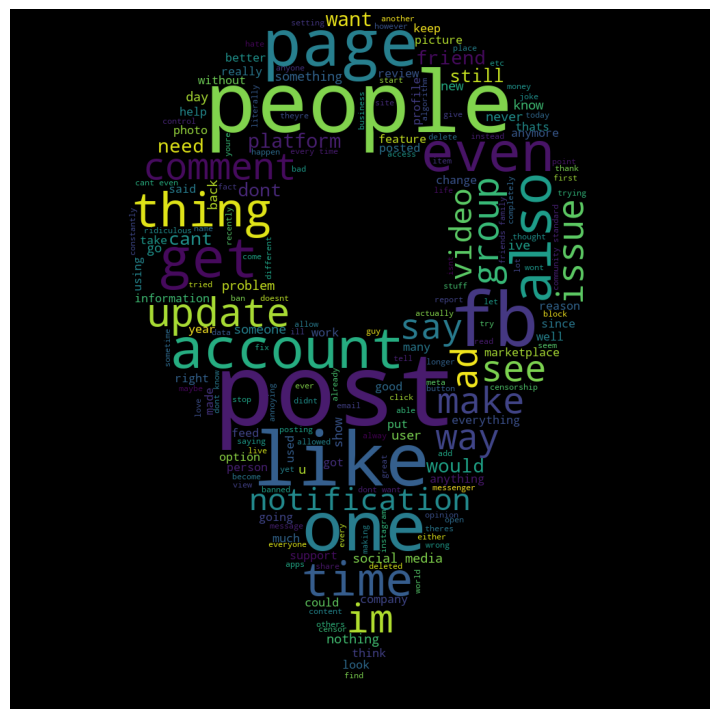

In [44]:
#Analysis of Review field
stopword = set(stopwords.words('english'))
text = " ".join(review for review in data.complete_review)
mask = np.array(Image.open("loc.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('review_sentiment.png')
plt.show()

In [45]:
#positive negative & neutral sentiment:
positive = data[data['sentiment'] == 2]
negative = data[data['sentiment'] == 0]
neutral = data[data['sentiment'] == 1]

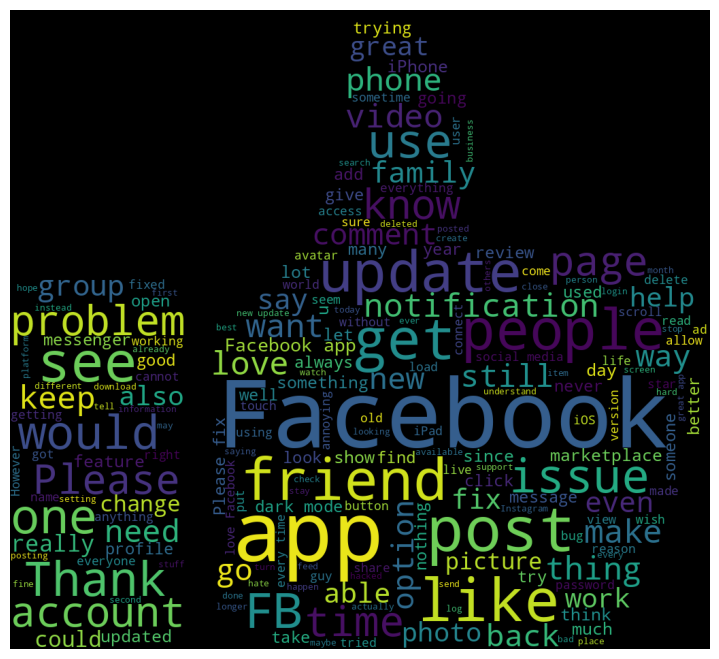

In [37]:
#Positive Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in positive.complete_review)
mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 2200, height = 2300,
                background_color ='black',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('positive_sentiment.png')
plt.show()
wordcloud.to_file("posid.png")

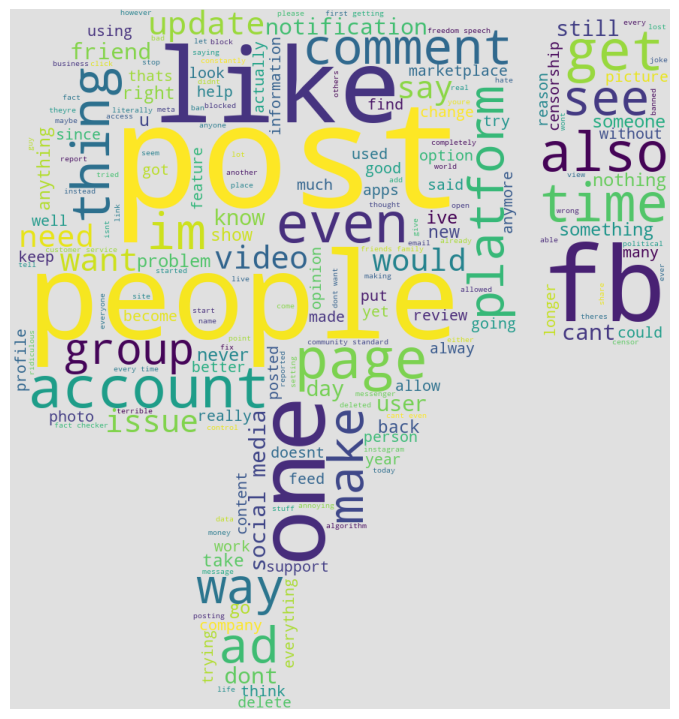

In [46]:
#Negative Setiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in negative.complete_review)
mask = np.array(Image.open("./thumbs_down.png"))
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='#E0E0E0',
                stopwords = stopword,
                min_font_size = 10, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('negative_sentiment.png')
plt.show()

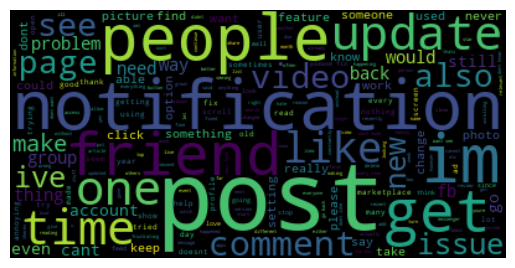

In [47]:
#Neutral Sentiment
stopword = set(stopwords.words('english'))
text = " ".join(review for review in neutral.complete_review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentiment Analysis Model

<h3> Bag of Word Vectorization </h3>

In [48]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
X = cv.fit_transform(data['complete_review'])
y = data['sentiment']

<h3> Handle Imbalanced Data </h3>

In [49]:
# Instantiate the SMOTE object
smote = SMOTE()

# Perform oversampling
X_oversampled, y_oversampled = smote.fit_resample(X, y)

<h3> Train Test Split </h3>

In [50]:
#Train Test split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled,
                                                  y_oversampled,
                                                  test_size=0.15,
                                                  random_state=17,stratify=y_oversampled)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12155, 18124)
(2146, 18124)
(12155,)
(2146,)


<h3> Multinomial Naive Bayes </h3>

In [51]:
#Training the model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

#Caluclating the accuracy score of the model
y_pred = MNB.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       740
           1       0.85      0.75      0.80       815
           2       0.75      0.90      0.82       591

    accuracy                           0.83      2146
   macro avg       0.83      0.83      0.83      2146
weighted avg       0.83      0.83      0.83      2146



<h3> Logistic Regression </h3>

In [52]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       709
           1       0.89      0.91      0.90       701
           2       0.93      0.90      0.92       736

    accuracy                           0.91      2146
   macro avg       0.91      0.91      0.91      2146
weighted avg       0.91      0.91      0.91      2146



<h3> Random Forest </h3>

In [53]:
# Initialize and train the random forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       735
           1       0.95      0.95      0.95       718
           2       0.96      0.99      0.98       693

    accuracy                           0.96      2146
   macro avg       0.96      0.96      0.96      2146
weighted avg       0.96      0.96      0.96      2146



<h3> XGBoost </h3>

In [54]:
# Create DMatrix for training and testing data
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Set the objective function for multi-class classification
    'num_class': 3,      # Number of classes in the dataset
    'eval_metric': 'merror',        # Evaluation metric (multi-class classification error rate)
    'eta': 0.4,                    # Learning rate
    'max_depth': 6,                # Maximum depth of a tree
    'subsample': 0.8,              # Subsample ratio of the training instances
    'colsample_bytree': 0.8,       # Subsample ratio of features when constructing each tree
    'seed': 42                     # Random seed for reproducibility
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the testing data
preds = model.predict(dtest)
pred_labels = [int(pred) for pred in preds]

print(classification_report(pred_labels, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       798
           1       0.91      0.99      0.95       659
           2       0.95      0.99      0.97       689

    accuracy                           0.95      2146
   macro avg       0.95      0.95      0.95      2146
weighted avg       0.95      0.95      0.95      2146



#Conclusion

The best-performing model was identified as XGBoost, which achieved an accuracy of 87% with the f1-score of 0.85 and above for all the labels(positive,negative & neutral). This model demonstrates the ability to accurately predict sentiment based on ChatGPT iOS reviews.

Overall, with the developed sentiment analysis model, we can effectively analyze and understand the sentiment expressed in ChatGPT reviews. This provides valuable insights for businesses, helping them make informed decisions, improve customer satisfaction, and enhance their products and services based on customer feedback.

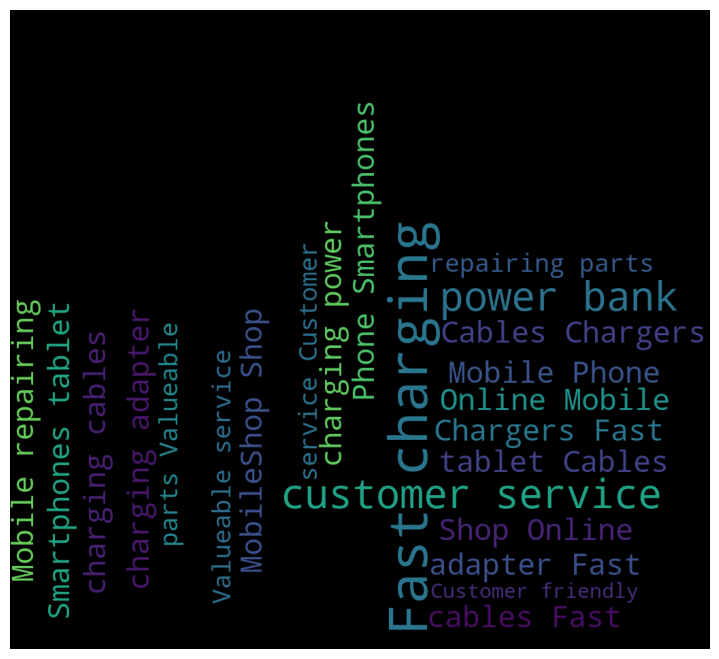

In [55]:
#Positive Setiment
text = "MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service,MobileShop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers,Fast charging adapter,Fast charging cables,Fast charging power bank,Fast charging car charger,Iconic headphones,Sim cards,Internet cards,Mobile repairing parts,Valueable service,Customer friendly environment,Easy to pocket, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"

mask = np.array(Image.open("thumbs_up.png"))
wordcloud = WordCloud(width = 1700, height = 3300,
                 background_color ='black',
                min_font_size = 30, mask=mask).generate(text)

# plot the WordCloud image
plt.figure(figsize = (7, 7), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('pds.png')
plt.show()
wordcloud.to_file("spd.png")



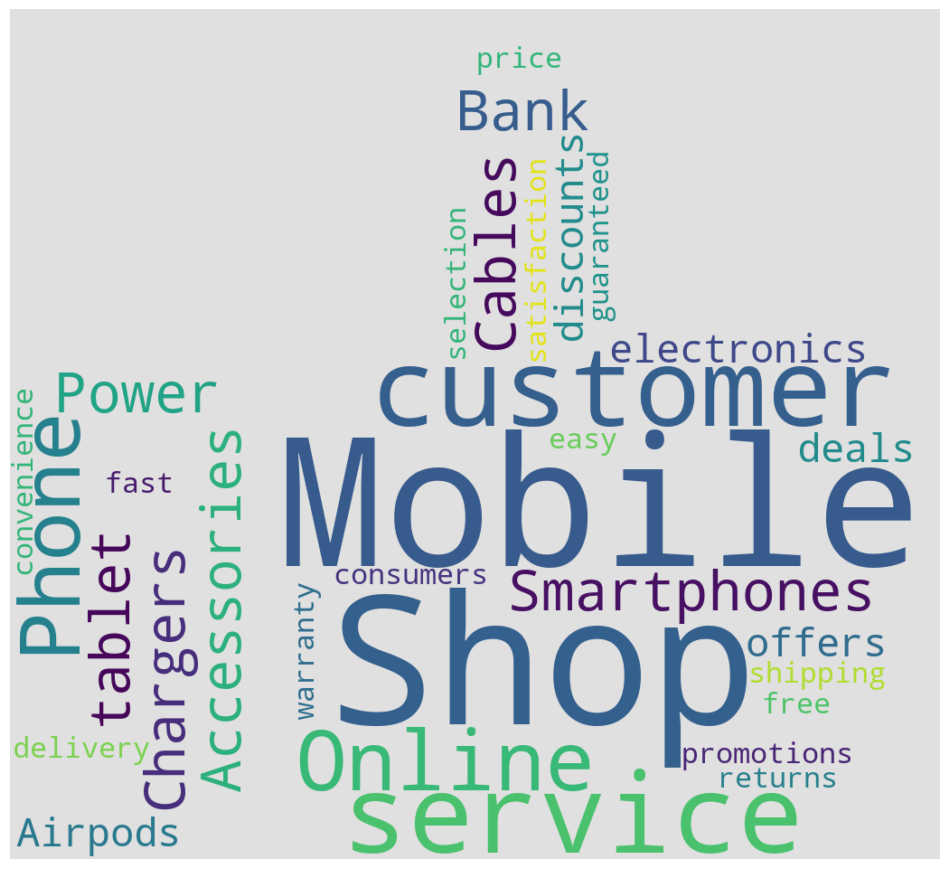

In [57]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

image_path = "loc.png"
image = Image.open(image_path)

wordcloud = WordCloud( background_color ='#E0E0E0',mask=mask)
text = "Mobile Shop, Shop Online, Mobile Phone, Smartphones,tablet, Cables, Chargers, Accessories,Power Bank ,electronics,Airpods,deals,discounts,offers, promotions, free shipping,fast delivery,easy returns, customer service, warranty, satisfaction guaranteed,consumers, convenience, selection, price, customer service"
wordcloud.generate(text)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the wordcloud image (optional)
wordcloud.to_file("wordcloud.png")